In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import pandas as pd
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white", color_codes=True)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\user\OneDrive\Desktop\ML work\Income_evaluation\income_evaluation.csv")
df.shape
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()

In [6]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [7]:
df['education-num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

### Encoding the categorical data

In [8]:
# Create an instance of OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the 'Category' and 'Priority' columns
df[['workclass','education','marital-status','occupation', 'relationship', 'race',
    'sex', 'native-country','income']] = encoder.fit_transform(df[['workclass','education','marital-status','occupation', 'relationship', 'race',
    'sex', 'native-country','income']])

# Display the encoded data
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7.0,77516,9.0,13,4.0,1.0,1.0,4.0,1.0,2174,0,40,39.0,0.0
1,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
2,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
3,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
4,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0


In [9]:
df.relationship.unique()

array([1., 0., 5., 3., 4., 2.])

In [10]:
X=df[['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']]
y=df['income']

In [11]:
print(X.shape)
print(y.shape)

(32561, 14)
(32561,)


#### Scaling the data

In [12]:
#scaling the data 
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
polynomial_svm_clf = Pipeline([
 ("poly_features", PolynomialFeatures(degree=3)),
 ("scaler", StandardScaler()),
 ("svm_clf", LinearSVC(C=10, loss="hinge"))
 ])
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [13]:
#splitting the data into test and train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
print(X_train.shape)
print(X_test.shape)

(26048, 14)
(6513, 14)


### 1.Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [16]:
#Regularization
# Construct a pipeline with scaling and logistic regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression())
])

# Define hyperparameters for grid search
param_grid = {
    'log_reg__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'log_reg__penalty': ['l1', 'l2']  # Penalty term
}
# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
# Print the best hyperparameters found
print("Best parameters:", grid_search.best_params_)

# Evaluate the model
accuracy = grid_search.score(X_test, y_test)
print("Test accuracy:", accuracy)

Best parameters: {'log_reg__C': 0.1, 'log_reg__penalty': 'l2'}
Test accuracy: 0.8245048364808844


In [17]:
# Training the Model
pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg', LogisticRegression())])

In [18]:
print(pipeline.score(X_train,y_train))
print(pipeline.score(X_test,y_test))

0.8245546683046683
0.8246583755565792


### 2.Decision Trees

In [19]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV

In [20]:
# Instantiatig the DecisionTreeClassifier
dt = DecisionTreeClassifier()
# Define your grid of parameters
grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Instantiate GridSearchCV with the DecisionTreeClassifier and parameter grid
dt_cv = GridSearchCV(dt, grid, cv=5)
# Fit the model to your training data
dt_cv.fit(X_train, y_train)
# Print the best parameters found by GridSearchCV
print("Best Parameters:", dt_cv.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [21]:
dt_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [22]:
print(dt_cv.score(X_train,y_train))
print(dt_cv.score(X_test,y_test))

0.8631756756756757
0.8569015814524796


### 3.Random Forest

In [23]:
# Random Forest

#Importing libraries and classes
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [24]:
## Regularization
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier
rf_classifier = RandomForestClassifier()

# Definining hyperparameters to search through
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform grid search with cross-validation to find the best parameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Fit the random forest classifier with the best parameters
best_rf_classifier = RandomForestClassifier(**best_params)
best_rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = best_rf_classifier.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_

In [25]:
# Training the model

best_rf_classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features='log2', n_estimators=50)

In [26]:
print(best_rf_classifier.score(X_train,y_train))
print(best_rf_classifier.score(X_test,y_test))

0.99625
0.875


### 4.Support Vector Machine

In [27]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid for grid search
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear', 'poly']}

# Create SVM classifier
svm = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate on test set
best_svm = grid_search.best_estimator_
test_accuracy = best_svm.score(X_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


Best Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Best Cross-Validation Score: 0.875
Test Accuracy: 0.88


In [28]:
from sklearn.svm import SVC
best_svm=SVC()
best_svm.fit(X_train,y_train)

SVC()

In [29]:
print('Train Score=',best_svm.score(X_train,y_train))
print('Test Score=',best_svm.score(X_test,y_test))

Train Score= 0.92875
Test Score= 0.845


### 5.XGboost

In [30]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from xgboost import XGBClassifier

# Define the XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Define the parameters grid for grid search
param_grid = {
    'reg_alpha': [0, 0.001, 0.01, 0.1, 1, 10],  # L1 regularization parameter
    'reg_lambda': [0, 0.001, 0.01, 0.1, 1, 10],  # L2 regularization parameter
    'gamma': [0, 0.01, 0.1, 1, 10]  # Minimum loss reduction to make further partition
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Print the best parameters and the corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'gamma': 0.1, 'reg_alpha': 0.001, 'reg_lambda': 1}
Best Accuracy: 0.9119999999999999


In [31]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Define the best parameters obtained from grid search
best_params = {
    'reg_alpha': 0.001,
    'reg_lambda': 1,
    'gamma': 0.1
}

# Initialize XGBoost classifier with best parameters
best_xgb_model = xgb.XGBClassifier(**best_params)

# Train the model on the training data
best_xgb_model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = best_xgb_model.predict(X_test)

# Calculate accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9


In [32]:
print(best_xgb_model.score(X_train,y_train))
print(best_xgb_model.score(X_test,y_test))

1.0
0.9


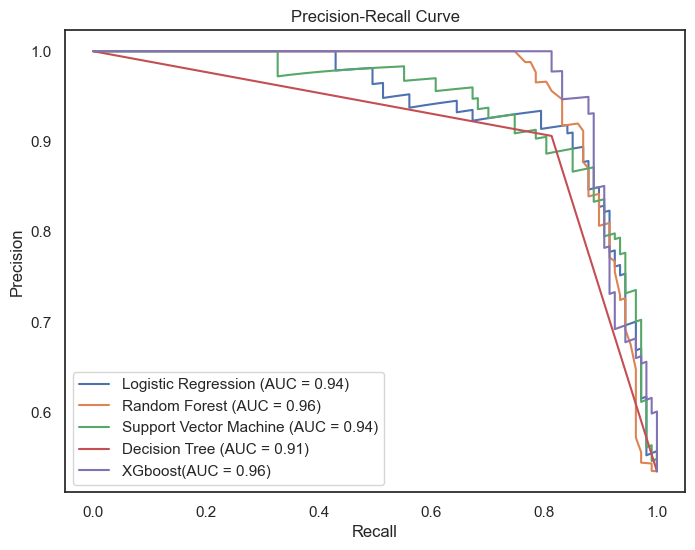

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Assuming you have your data X and y defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your classifiers
classifier1 = LogisticRegression()
classifier2 = RandomForestClassifier()
classifier3 = SVC()
classifier4 = DecisionTreeClassifier()
classifier5= XGBClassifier()

classifier1.fit(X_train, y_train)
classifier2.fit(X_train, y_train)
classifier3.fit(X_train, y_train)
classifier4.fit(X_train, y_train)
classifier5.fit(X_train, y_train)

# Make predictions
y_pred_prob1 = classifier1.predict_proba(X_test)[:, 1]
y_pred_prob2 = classifier2.predict_proba(X_test)[:, 1]
y_pred_prob3 = classifier3.decision_function(X_test)
y_pred_prob4 = classifier4.predict_proba(X_test)[:, 1]
y_pred_prob5 = classifier5.predict_proba(X_test)[:, 1]
# Calculate precision-recall curves and AUCs
precision1, recall1, _ = precision_recall_curve(y_test, y_pred_prob1)
auc1 = auc(recall1, precision1)

precision2, recall2, _ = precision_recall_curve(y_test, y_pred_prob2)
auc2 = auc(recall2, precision2)

precision3, recall3, _ = precision_recall_curve(y_test, y_pred_prob3)
auc3 = auc(recall3, precision3)

precision4, recall4, _ = precision_recall_curve(y_test, y_pred_prob4)
auc4 = auc(recall4, precision4)

precision5, recall5, _ = precision_recall_curve(y_test, y_pred_prob5)
auc5 = auc(recall5, precision5)
# Plot precision-recall curves
plt.figure(figsize=(8, 6))

plt.plot(recall1, precision1, label=f'Logistic Regression (AUC = {auc1:.2f})')
plt.plot(recall2, precision2, label=f'Random Forest (AUC = {auc2:.2f})')
plt.plot(recall3, precision3, label=f'Support Vector Machine (AUC = {auc3:.2f})')
plt.plot(recall4, precision4, label=f'Decision Tree (AUC = {auc4:.2f})')
plt.plot(recall5, precision5, label=f'XGboost(AUC = {auc5:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
